In [199]:
# 1. Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

# Carregar variáveis de ambiente (.env)
load_dotenv()


False

**Row ID (ID da Linha)** – Um número que indica a posição da linha. Esta coluna é dispensável, já que iremos trabalhar com o índice do DataFrame.

**Order ID (ID da Encomenda)** – Um código que identifica a encomenda. Este valor não é único, pois cada linha do DataFrame refere-se a um produto. Assim, podemos ter várias linhas com o mesmo Order ID, representando diferentes produtos comprados na mesma encomenda.

**Order Date (Data da Encomenda)** – Data em que a encomenda foi realizada.

**Ship Date (Data de Envio)** – Data em que a encomenda foi enviada para entrega.

**Ship Mode (Modo de Envio)** – Esta coluna indica o tipo de entrega utilizado para a encomenda: Second Class (segunda classe), Standard Class (classe padrão), First Class (primeira classe) e Same Day (entrega no mesmo dia).

**Customer ID (ID do Cliente)** – Identificador único de cada cliente. Este valor deverá ser único?

**Customer Name (Nome do Cliente)** – Nome do cliente.

**Segment (Segmento)** – Segmento ao qual o cliente pertence. Pode ser Consumer (consumidor final), Corporate (corporativo) ou Home Office (escritório doméstico), distinguindo entre compras pessoais, empresariais ou para escritório em casa.

**Country (País)** – País do cliente. Neste caso, apenas os Estados Unidos estão presentes, ou seja, este e-commerce actua apenas a nível nacional.

**City (Cidade)** – Cidade do cliente.

**State (Estado)** – Estado norte-americano onde se encontra o cliente.

**Postal Code (Código Postal)** – Código postal do cliente.

**Region (Região)** – Região dos Estados Unidos em que o cliente se encontra. Está dividida em South (Sul), West (Oeste), Central (Centro) e East (Este).

**Product ID (ID do Produto)** – Identificador do produto. Este valor deverá ser único?

**Category (Categoria)** – Categoria principal do produto, dividida em Furniture (Mobiliário), Office Supplies (Material de Escritório) e Technology (Tecnologia).

**Sub-Category (Subcategoria)** – Classificação mais específica dos produtos, incluindo: Bookcases (Estantes), Chairs (Cadeiras), Labels (Etiquetas), Tables (Mesas), Storage (Armazenamento), Furnishings (Artigos de Fixação), Art (Materiais artísticos como canetas e marcadores), Phones (Telefones), Binders (Dossiers), Appliances (Eletrodomésticos), Paper (Papel), Accessories (Acessórios), Envelopes (Envelopes), Fasteners (Fixadores), Supplies (Suprimentos), Machines (Máquinas) e Copiers (Fotocopiadoras).

**Product Name (Nome do Produto)** – Nome do produto.

**Sales (Valor da Encomenda)** – Valor total da venda em dólares.

**Quantity (Quantidade)** – Quantidade de unidades do produto na encomenda.

**Discount (Desconto)** – Percentagem de desconto aplicada ao pedido.

**Profit (Lucro)** – Lucro obtido com a venda do produto.



In [225]:
# caminho para o seu arquivo .xls
caminho_arquivo = 'C:/Users/lagma/Desktop/projetos/Projeto_Vendas/data/US_Superstore_data.xls'

# Carrega o arquivo Excel para um DataFrame
df = pd.read_excel(caminho_arquivo)


In [226]:
# Exibe as primeiras linhas para verificar se a importação foi correta
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [227]:
# Visão geral do dataset
print(df.shape)


(9994, 21)


Limpeza dos dados

In [228]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [204]:
# Verificar se existem dados nulos
nulos = df.isnull().sum()
print(nulos)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [205]:
# Verificar a existência de dados duplicados
duplicados = df.duplicated().sum()
print(duplicados)


0


In [206]:
df.columns = df.columns.str.strip()  

# Agora elimina com segurança
df.drop(['Row ID'], axis='columns', inplace=True)



In [207]:
# Verificar se um Order ID corresponde a vários produtos
df['Order ID'].value_counts().head(10)


Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
CA-2016-105732    10
CA-2015-131338    10
CA-2015-158421     9
CA-2014-106439     9
US-2015-163433     9
Name: count, dtype: int64

In [208]:
# Ver quantos produtos diferentes existem por pedido
df.groupby('Order ID')['Product Name'].nunique()


Order ID
CA-2014-100006    1
CA-2014-100090    2
CA-2014-100293    1
CA-2014-100328    1
CA-2014-100363    2
                 ..
US-2017-168802    1
US-2017-169320    2
US-2017-169488    2
US-2017-169502    2
US-2017-169551    6
Name: Product Name, Length: 5009, dtype: int64

In [209]:
# Analisar o valor total de cada pedido
total_pedidos = df.groupby('Order ID')['Sales'].sum().sort_values(ascending=False)
print(total_pedidos.head())


Order ID
CA-2014-145317    23661.228
CA-2016-118689    18336.740
CA-2017-140151    14052.480
CA-2017-127180    13716.458
CA-2014-139892    10539.896
Name: Sales, dtype: float64


In [210]:
# O dataframe  chama-se 'df'e tem as colunas 'Order ID', 'Product ID', 'Quantity'

# Agrupar por 'Order ID' e listar os 'Product ID'
produtos_por_encomenda = df.groupby('Order ID')['Product ID'].unique()
print(produtos_por_encomenda)

# Agrupar por 'Order ID' e verificar se a 'Order Date' é sempre a mesma
datas_por_encomenda = df.groupby('Order ID')['Order Date'].nunique()
print(datas_por_encomenda) # Se algum valor for maior que 1, há datas diferentes


Order ID
CA-2014-100006                                    [TEC-PH-10002075]
CA-2014-100090                   [FUR-TA-10003715, OFF-BI-10001597]
CA-2014-100293                                    [OFF-PA-10000176]
CA-2014-100328                                    [OFF-BI-10000343]
CA-2014-100363                   [OFF-FA-10000611, OFF-PA-10004733]
                                        ...                        
US-2017-168802                                    [OFF-BI-10002393]
US-2017-169320                   [OFF-AR-10003602, TEC-AC-10002550]
US-2017-169488                   [OFF-PA-10002659, OFF-PA-10000157]
US-2017-169502                   [OFF-SU-10004115, OFF-AP-10001947]
US-2017-169551    [FUR-BO-10001519, OFF-PA-10004100, TEC-PH-1000...
Name: Product ID, Length: 5009, dtype: object
Order ID
CA-2014-100006    1
CA-2014-100090    1
CA-2014-100293    1
CA-2014-100328    1
CA-2014-100363    1
                 ..
US-2017-168802    1
US-2017-169320    1
US-2017-169488    1
US-2017-

In [211]:
# Verificar se há datas de envio diferentes para o mesmo 'Order ID'
datas_envio_por_encomenda = df.groupby('Order ID')['Ship Date'].nunique()
print(datas_envio_por_encomenda) # Se algum valor for maior que 1, há datas diferentes

# Verificar se há números de rastreio diferentes para o mesmo 'Order ID' (se tiveres essa coluna)
# numeros_rastreio_por_encomenda = df.groupby('Order ID')['Tracking Number'].nunique()
# print(numeros_rastreio_por_encomenda)


Order ID
CA-2014-100006    1
CA-2014-100090    1
CA-2014-100293    1
CA-2014-100328    1
CA-2014-100363    1
                 ..
US-2017-168802    1
US-2017-169320    1
US-2017-169488    1
US-2017-169502    1
US-2017-169551    1
Name: Ship Date, Length: 5009, dtype: int64


In [212]:
# Encontrar linhas completamente duplicadas
linhas_duplicadas = df[df.duplicated(keep=False)] # 'keep=False' mostra todas as duplicadas
print(linhas_duplicadas)

# Contar quantas vezes cada linha aparece
contagem_linhas = df.groupby(list(df.columns)).size().reset_index(name='count')
print(contagem_linhas[contagem_linhas['count'] > 1]) # Mostrar linhas que aparecem mais de uma vez


            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3405  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   
3406  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State  Postal Code  \
3405  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   

     Region       Product ID   Category Sub-Category  \
3405   East  FUR-CH-10002965  Furniture       Chairs   
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
3405  Global Leather Highback Executive Chair with P...  281.372         2   
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3405       0.3 -12.0588  
3406       0.3 -12.0588  
            Order ID Order Date  Ship Date       Sh

In [213]:
# Converter colunas de data para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


## Resumo estatístico e análise geral

In [214]:
# Resumo estatístico das variáveis numéricas
df.describe()


,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [215]:
# Distribuições das variáveis categóricas
categoricas = df.select_dtypes(include='object').columns
for col in categoricas:
    print(f'\n{col}:\n', df[col].value_counts())
    


Order ID:
 Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-110422     1
CA-2016-125794     1
CA-2017-163566     1
US-2015-151435     1
CA-2016-130225     1
Name: count, Length: 5009, dtype: int64

Ship Mode:
 Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Customer ID:
 Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
            ..
AO-10810     1
LD-16855     1
JR-15700     1
CJ-11875     1
RE-19405     1
Name: count, Length: 793, dtype: int64

Customer Name:
 Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Lela Donovan            1
Jocasta Rupert          1
Carl Jackson            1
Ricardo Emerson         1
Name: count, Length

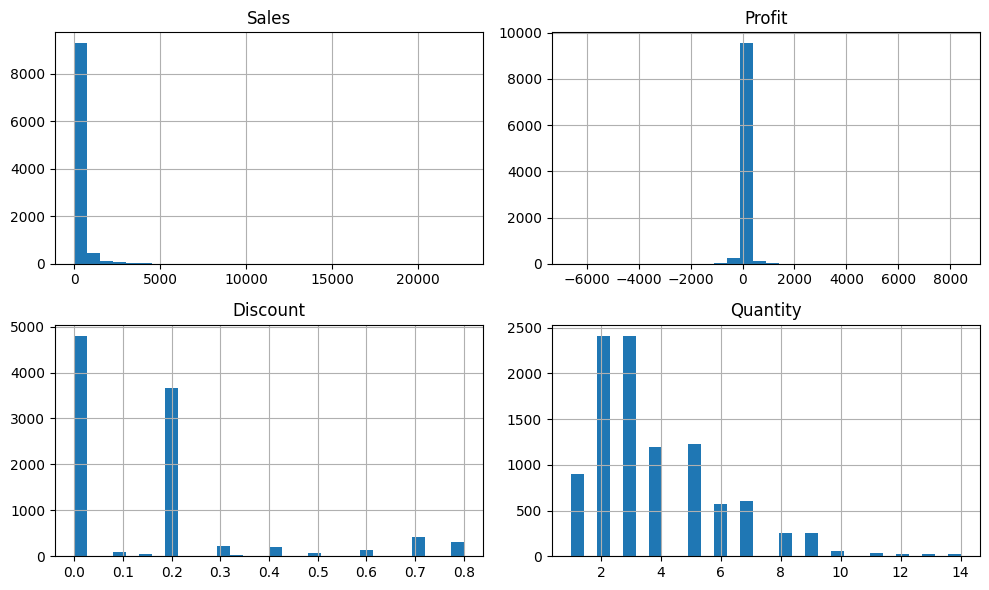

In [216]:
# Distribuições das variáveis contínuas
df[['Sales', 'Profit', 'Discount', 'Quantity']].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()


#### Detecção de outliers com boxplots

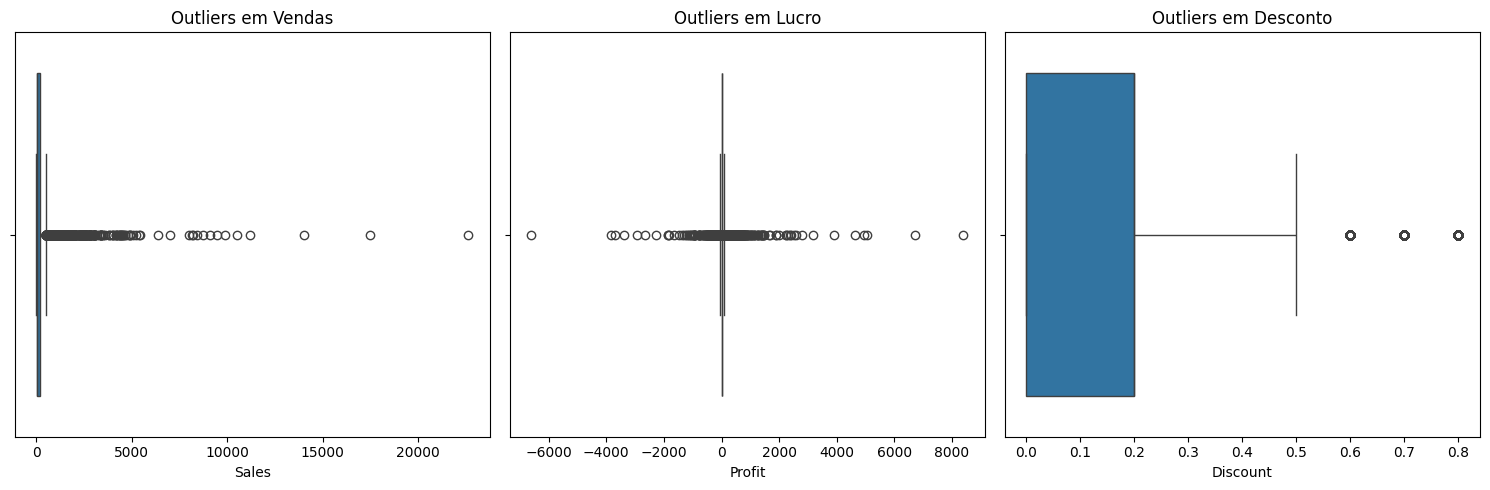

In [217]:
# Boxplot para detectar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='Sales', ax=axes[0])
sns.boxplot(data=df, x='Profit', ax=axes[1])
sns.boxplot(data=df, x='Discount', ax=axes[2])
axes[0].set_title('Outliers em Vendas')
axes[1].set_title('Outliers em Lucro')
axes[2].set_title('Outliers em Desconto')
plt.tight_layout()
plt.show()


### Visualizações estratégicas

####  Vendas por região, estado e categoria:

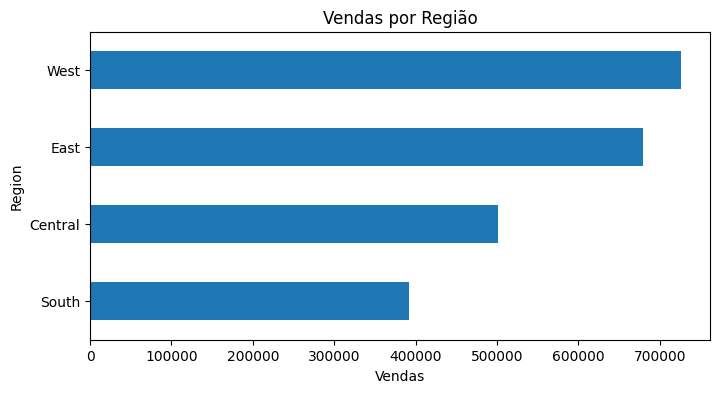

In [218]:
# Vendas por Região
df.groupby('Region')['Sales'].sum().sort_values().plot(kind='barh', title='Vendas por Região', figsize=(8,4))
plt.xlabel('Vendas')
plt.show()


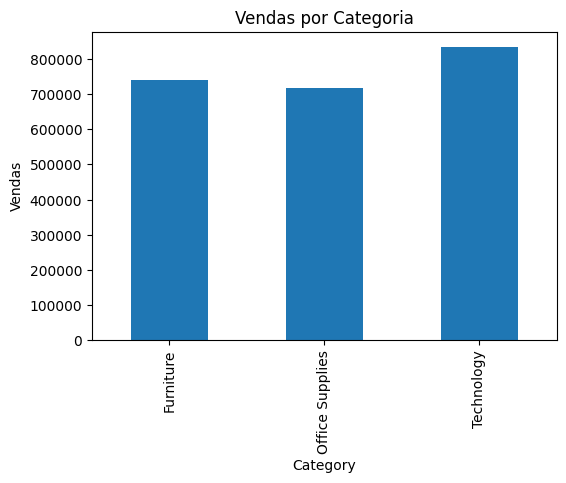

In [219]:
# Vendas por Categoria
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Vendas por Categoria', figsize=(6,4))
plt.ylabel('Vendas')
plt.show()


### Relação entre desconto e lucro:

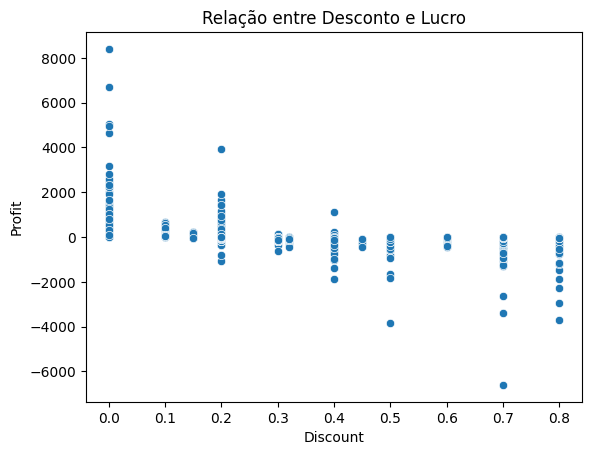

In [220]:
# Scatter plot de Desconto vs Lucro
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Relação entre Desconto e Lucro')
plt.show()


### Lucro por categoria e subcategoria:

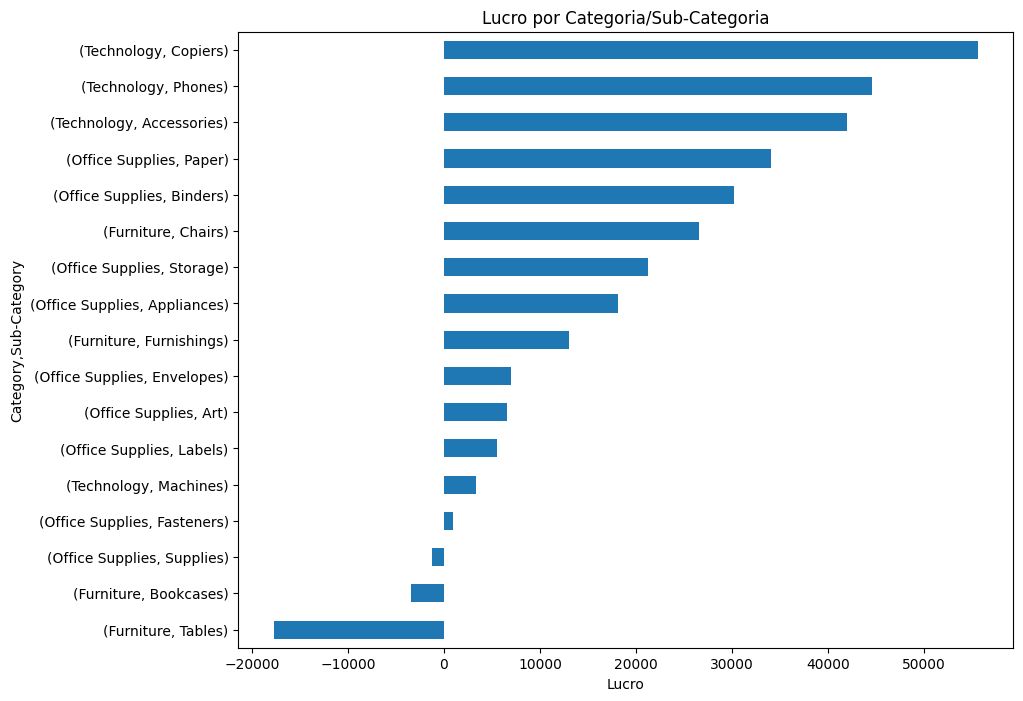

In [221]:
lucro_sub = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values()
lucro_sub.plot(kind='barh', figsize=(10,8), title='Lucro por Categoria/Sub-Categoria')
plt.xlabel('Lucro')
plt.show()


### Evolução temporal de vendas e lucros:

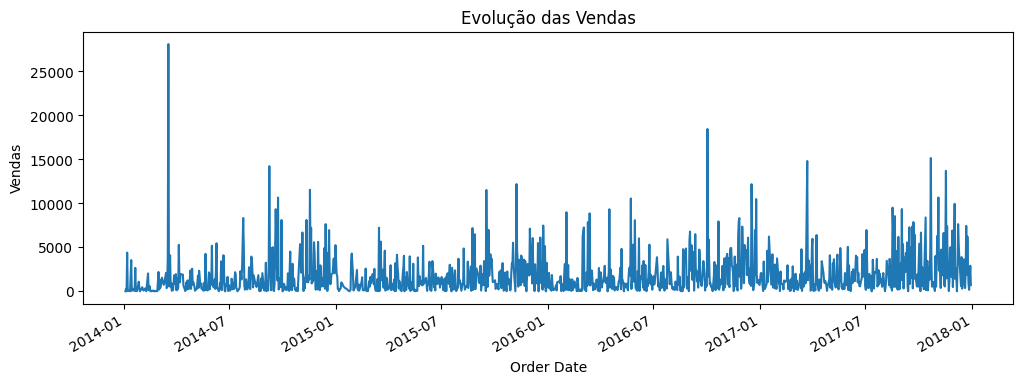

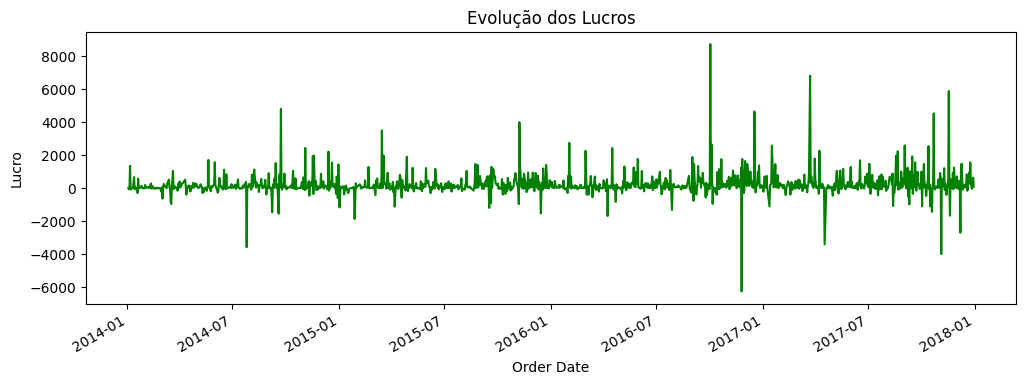

In [222]:
# Vendas ao longo do tempo
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12,4), title='Evolução das Vendas')
plt.ylabel('Vendas')
plt.show()

# Lucros ao longo do tempo
df.groupby('Order Date')['Profit'].sum().plot(figsize=(12,4), title='Evolução dos Lucros', color='green')
plt.ylabel('Lucro')
plt.show()


### Mapa de calor de correlação:

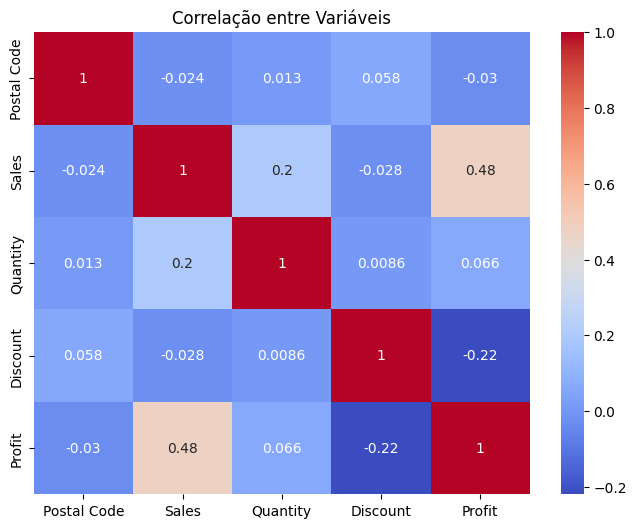

In [223]:
# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()


In [224]:
# Criar um novo DataFrame a partir do df limpo
Superstore_dados_limpos = df.copy()

import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Carregar variáveis do arquivo .env
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
port = os.getenv('PORT')
database = os.getenv('DATABASE')

if not all([user, password, host, port, database]):
    raise ValueError("Uma ou mais variáveis de ambiente não foram carregadas corretamente.")

# Montar a string de conexão
connection_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

# Criar o engine
engine = create_engine(connection_string)

# Enviar o DataFrame para o PostgreSQL
Superstore_dados_limpos.to_sql(
    'Superstore_dados_limpos',
    engine,
    if_exists='replace',
    index=False
)
print("✅ DataFrame salvo no PostgreSQL na tabela 'Superstore_dados_limpos' com sucesso.")


✅ DataFrame salvo no PostgreSQL na tabela 'Superstore_dados_limpos' com sucesso.
